<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [4]:
portfolio_df = pd.read_csv("C:/Users/gaelm/Desktop/mini_project_finanzas/financial_assets_prices.csv")

In [5]:
portfolio_df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


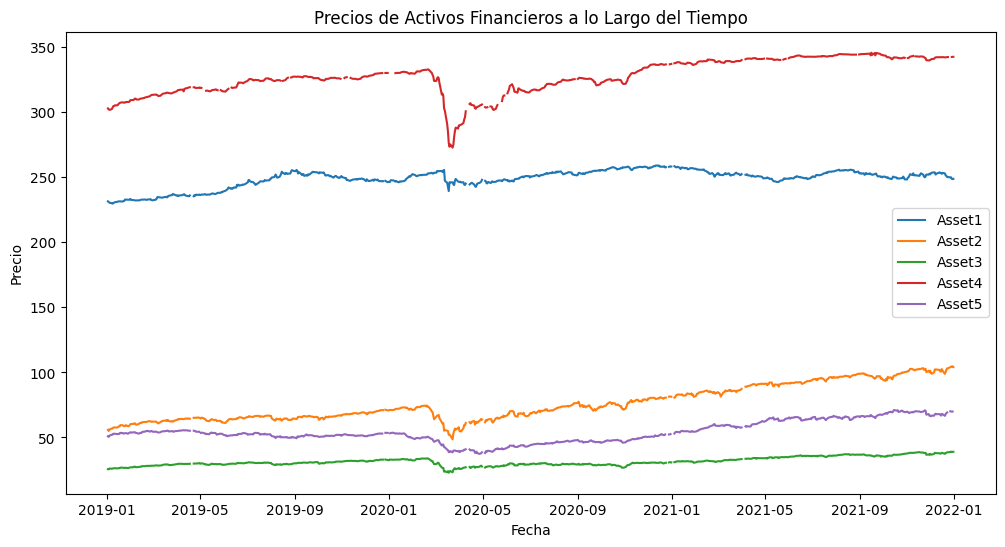

In [5]:
portfolio_df["date"] = pd.to_datetime(portfolio_df["date"])
portfolio_df.set_index("date", inplace=True)
plt.figure(figsize=(12, 6))
for column in portfolio_df.columns:
    plt.plot(portfolio_df.index, portfolio_df[column], label=column)
plt.title("Precios de Activos Financieros a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [6]:
daily_returns = portfolio_df.pct_change() * 100
print(daily_returns.head())

              Asset1    Asset2    Asset3    Asset4    Asset5
date                                                        
2019-01-02       NaN       NaN       NaN       NaN       NaN
2019-01-03 -0.203234 -1.607159 -0.569902 -0.270690 -0.943211
2019-01-04 -0.273984  2.095422  2.525524 -0.112542  1.924221
2019-01-07 -0.151170  1.263162 -0.733753  0.185572  1.479175
2019-01-08 -0.153486  0.100285  0.703977  0.360533 -0.019179


C:\Users\gaelm\AppData\Local\Temp\ipykernel_9244\503276836.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = portfolio_df.pct_change() * 100


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

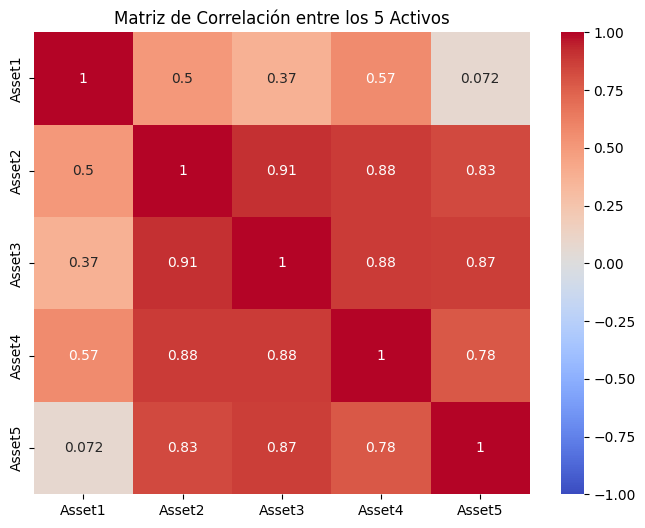

In [7]:
correlation_matrix = portfolio_df.iloc[:, :5].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre los 5 Activos")
plt.show()

<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

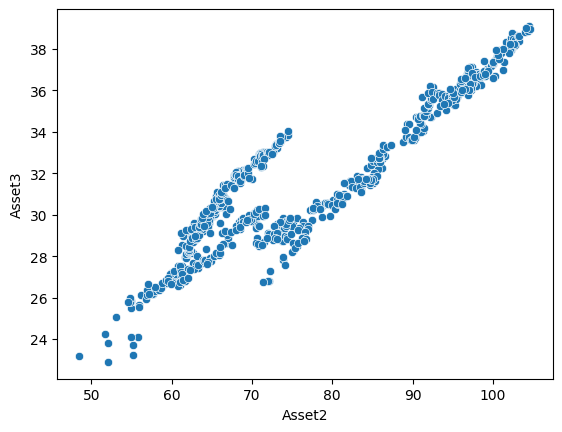

In [9]:
sns.scatterplot(data=portfolio_df, x='Asset2', y='Asset3')
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [9]:
portfolio_df = pd.read_csv("C:/Users/gaelm/Desktop/mini_project_finanzas/portfolio_weights.csv")

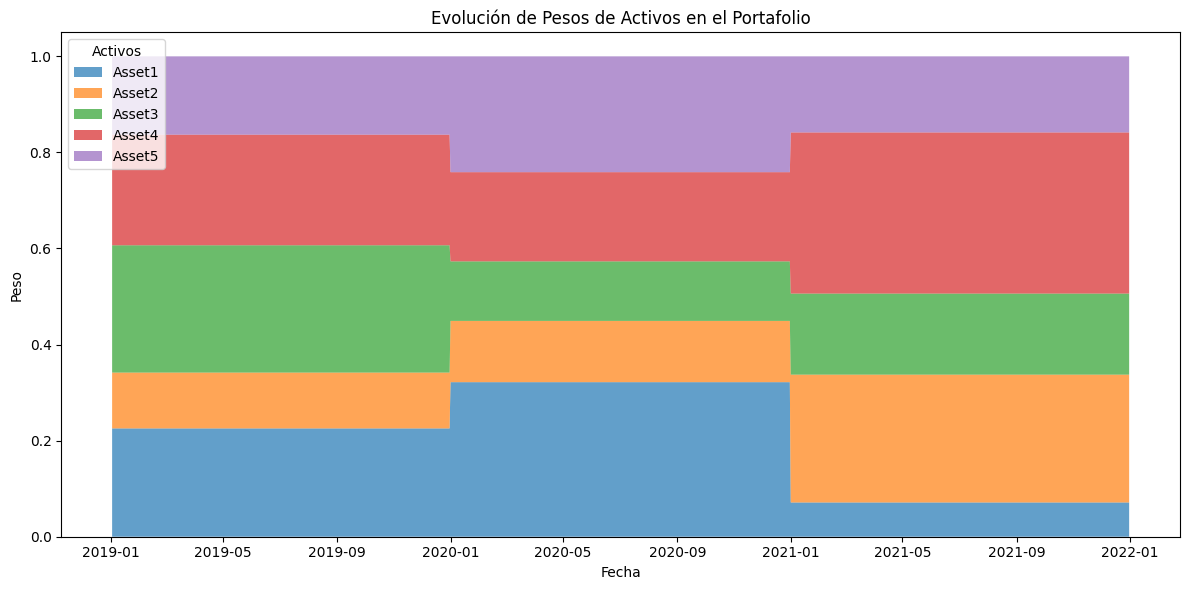

In [10]:
portfolio_df['date'] = pd.to_datetime(portfolio_df['date'])

plt.figure(figsize=(12, 6))

plt.stackplot(portfolio_df['date'], portfolio_df.iloc[:, 1:].T, labels=portfolio_df.columns[1:], alpha=0.7)

plt.title('Evolución de Pesos de Activos en el Portafolio')
plt.xlabel('Fecha')
plt.ylabel('Peso')
plt.legend(loc='upper left', title="Activos")

plt.tight_layout()

plt.show()

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>